July 8th. 2021. John Park. Spatial Autocorrelation. 

In [5]:
ISIT<-read.table("data/ISIT.txt",header = TRUE)

In [33]:
library(lattice); library(mgcv);library(nlme)
library(dplyr)
ISIT2<-ISIT%>%mutate(fMonth=factor(Month))%>%mutate(fStation=factor(Station))%>%mutate(fYear=factor(Year))%>%
filter(!fStation%in%c("4","5","10"))

From Zuur et al. (2009), p400.

$$ S_{is}=\alpha + a_{i}+f(Depth_{s})+Month_{i}+\varepsilon_{is} $$

$$\varepsilon_{is} \sim N(0, \sigma_{i}^2 |Depth_{s}|^{\delta_{i}})$$

- Heterogeniety between stations and hetergeniety within stations along depth. 
- Heterogeniety within stations along depth is allowed to differ between the stations. 
- 


In [18]:
M1=gam(Sources ~ fStation + s(SampleDepth)+fMonth, data=ISIT2)

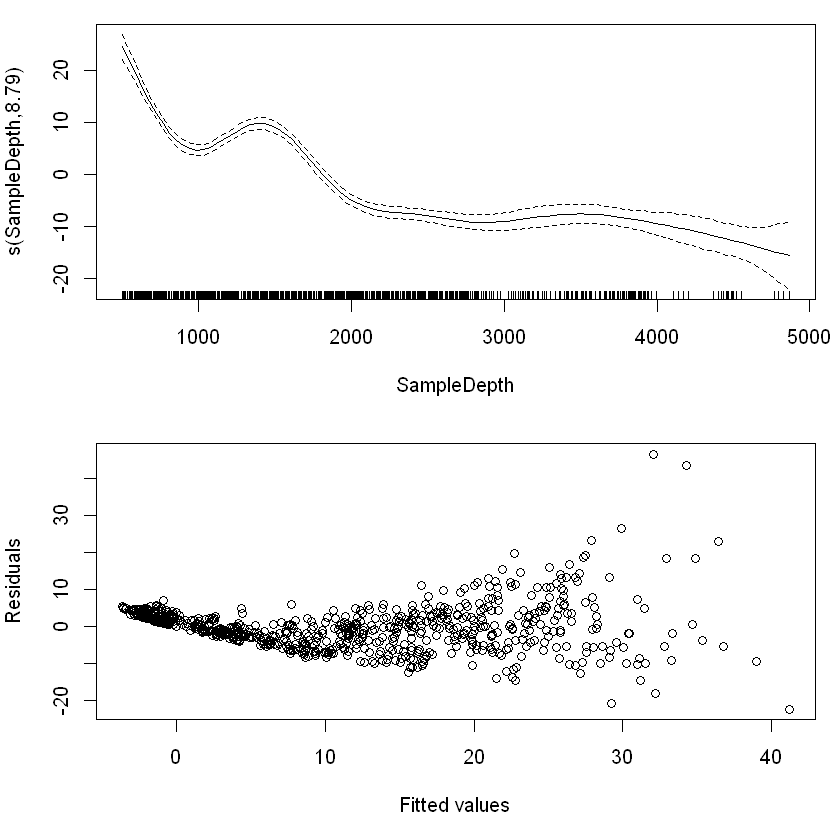

In [21]:
E=resid(M1)
F=fitted(M1)
op<-par(mfrow=c(2,1), mar=c(5,4,1,1))
plot(M1)
plot(F,E,xlab="Fitted values",ylab="Residuals")
par(op)

In [44]:
lmc=lmeControl(niterEM = 500, msMaxIter = 100)
ISIT2$Depth1000=ISIT2$SampleDepth/1000; #suggested by the book 

M17.E=gamm(Sources ~ s(Depth1000)+fMonth, random= list(fStation =~1), 
           method = "REML", control= lmc, data=ISIT2,
           weights= varComb(varIdent(form =~1 |fStation),
                            varPower(form=~Depth1000 | fStation)
               )
          )

AIC(M17.E$lme)

ERROR: Error in environment(attr(ret$lme$modelStruct$varStruct, "formula")) <- .GlobalEnv: attempt to set an attribute on NULL


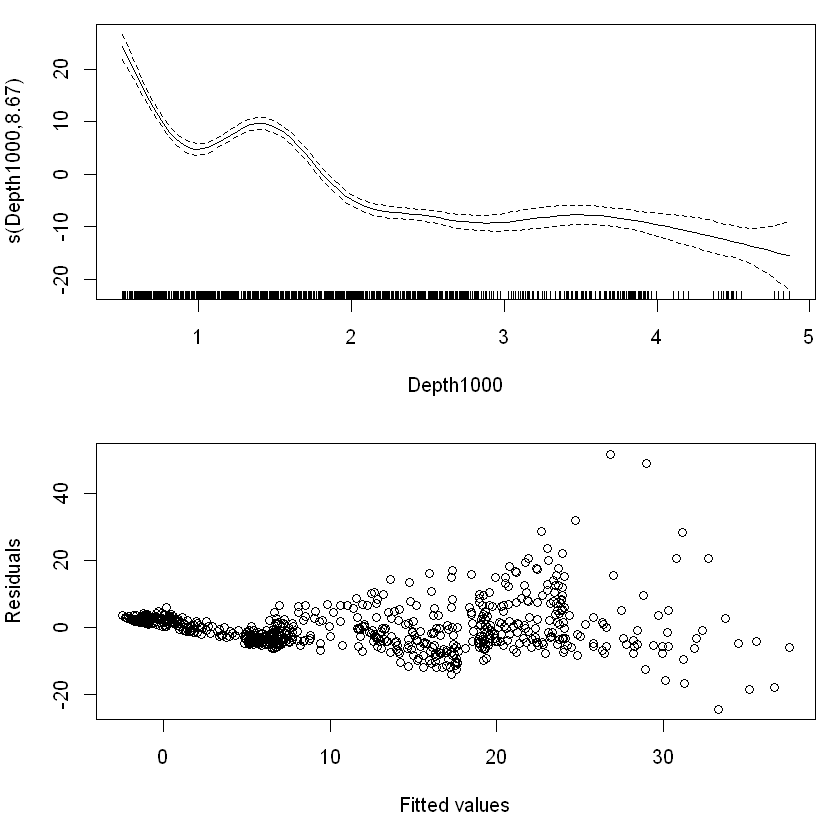

In [63]:
E=resid(M17.E$gam)%>%as.vector()
F=fitted(M17.E$gam)%>%as.vector()
op<-par(mfrow=c(2,1), mar=c(5,4,1,1))
plot(M17.E$gam)
plot(F,E,xlab="Fitted values",ylab="Residuals")
par(op)

# No changes to the residual plot??? why??

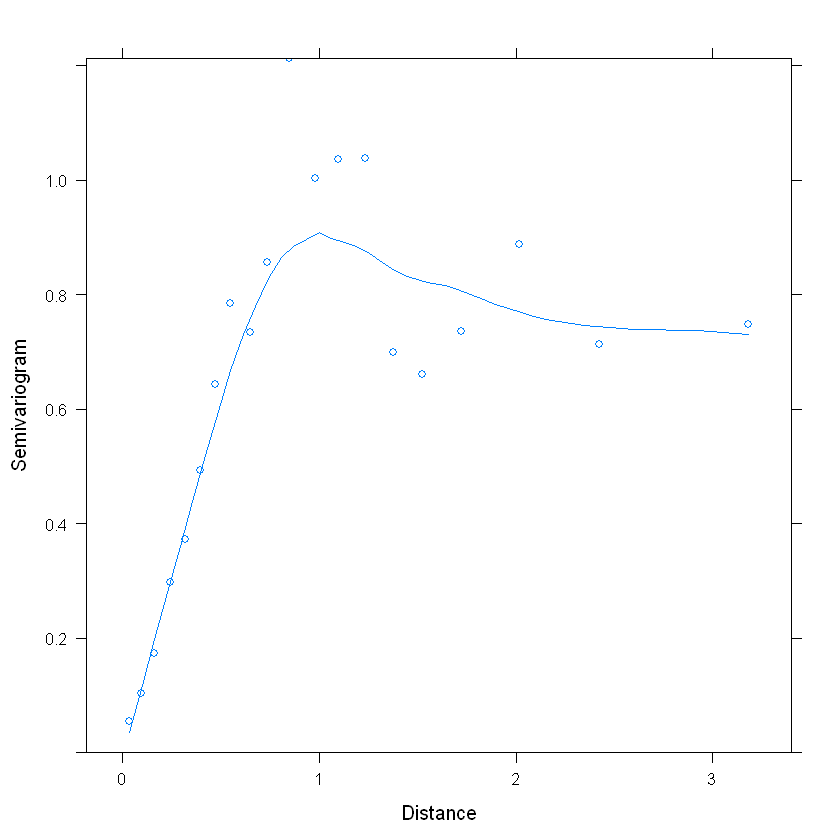

In [67]:
Vario17.4E = Variogram (M17.E$lme, robust=TRUE, data=ISIT2, form=~Depth1000 | fStation)
plot(Vario17.4E)